In [1]:
# Download dataset

# NOTE: this url may be temporary, the current long term storage is on Kaggle: https://www.kaggle.com/datasets/pelmers/github-repository-metadata-with-5-stars
DATA_URL = 'https://file2.pelmers.com/repo_metadata.json'
DATA_PATH = 'repo_metadata.json'

import os, sys, subprocess

# Define function x that given a command string, runs it with subprocess and streams the output
def x(cmd):
    p = subprocess.Popen(cmd, shell=True, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
    buf = getattr(sys.stdout, 'buffer', sys.stdout)
    for c in iter(lambda: p.stdout.read(1), b""):
        # of course this won't work if the byte is not printable but we'll ignore that for now
        buf.write(c.decode('utf-8', 'ignore'))
    retval = p.wait()
    return retval

if not os.path.exists(DATA_PATH):
    print('Downloading dataset...')
    x(f'curl -O {DATA_URL}')
    print(f'Datset downloaded to {DATA_PATH}')

In [2]:
# Import data with pandas

import pandas as pd

compression = None if DATA_PATH.endswith('.json') else 'infer'
df = pd.read_json(DATA_PATH, compression=compression)

print("Data loaded from {}.".format(DATA_PATH))

Data loaded from repo_metadata.json.


In [3]:
# Print data column names, number of rows, and example row

print(f"Data columns: {df.columns}")
print(f"Number of rows: {len(df)}")
print(f"First row:\n{df.head(1)}")

Data columns: Index(['owner', 'name', 'stars', 'forks', 'watchers', 'isFork', 'isArchived',
       'languages', 'languageCount', 'topics', 'topicCount', 'diskUsageKb',
       'pullRequests', 'issues', 'description', 'primaryLanguage', 'createdAt',
       'pushedAt', 'defaultBranchCommitCount', 'license',
       'assignableUserCount', 'codeOfConduct', 'forkingAllowed',
       'nameWithOwner', 'parent'],
      dtype='object')
Number of rows: 3274587
First row:
          owner          name   stars  forks  watchers  isFork  isArchived  \
0  freeCodeCamp  freeCodeCamp  371122  33158      8446   False       False   

                                           languages  languageCount  \
0  [{'name': 'TypeScript', 'size': 1562670}, {'na...              9   

                                              topics  ...  primaryLanguage  \
0  [{'name': 'learn-to-code', 'stars': 388}, {'na...  ...       TypeScript   

              createdAt              pushedAt  defaultBranchCommitCount  \
0  20

<Axes: title={'center': 'Top 10 languages'}, xlabel='primaryLanguage', ylabel='Number of repositories'>

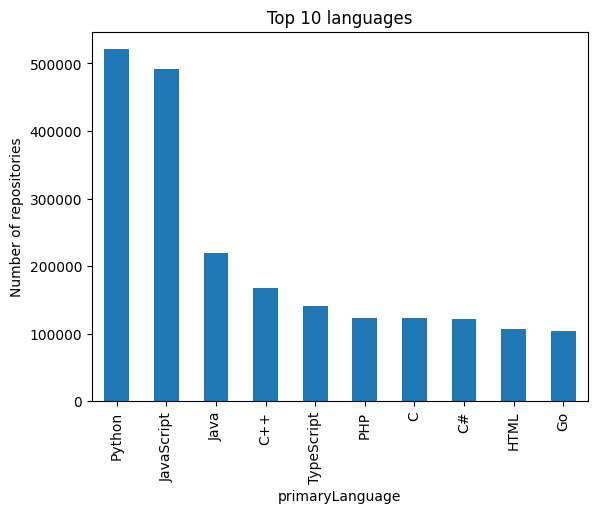

In [4]:
import matplotlib.pyplot as plt

# Group by 'primaryLanguage' and show a bar graph of the top 10 languages, make sure the bar chart has a title and axis labels
plt.title('Top 10 languages')
plt.ylabel('Number of repositories')
df.groupby('primaryLanguage').size().sort_values(ascending=False).head(10).plot.bar()

In [5]:
# Top 10 entries by stars
df.sort_values(by='stars', ascending=False).head(10)

,owner,name,stars,forks,watchers,isFork,isArchived,languages,languageCount,topics,...,primaryLanguage,createdAt,pushedAt,defaultBranchCommitCount,license,assignableUserCount,codeOfConduct,forkingAllowed,nameWithOwner,parent
0,freeCodeCamp,freeCodeCamp,371122,33158,8446,False,False,"[{'name': 'TypeScript', 'size': 1562670}, {'na...",9,"[{'name': 'learn-to-code', 'stars': 388}, {'na...",...,TypeScript,2014-12-24T17:49:19Z,2023-08-18T08:50:17Z,33585.0,"BSD 3-Clause ""New"" or ""Revised"" License",48,Other,True,freeCodeCamp/freeCodeCamp,NaN
1,EbookFoundation,free-programming-books,295895,56913,9733,False,False,[],0,"[{'name': 'education', 'stars': 535}, {'name':...",...,None,2013-10-11T06:50:37Z,2023-08-17T07:21:18Z,8386.0,Creative Commons Attribution 4.0 International,13,Contributor Covenant,True,EbookFoundation/free-programming-books,NaN
2,996icu,996.ICU,267804,21532,4242,False,True,[],0,[],...,None,2019-03-26T07:31:14Z,2023-06-16T20:06:43Z,3195.0,Other,2,None,True,996icu/996.ICU,NaN
3,sindresorhus,awesome,265809,26349,7549,False,False,[],0,"[{'name': 'awesome', 'stars': 68077}, {'name':...",...,None,2014-07-11T13:42:37Z,2023-08-17T17:07:48Z,1103.0,Creative Commons Zero v1.0 Universal,1,Contributor Covenant,True,sindresorhus/awesome,NaN
4,jwasham,coding-interview-university,263430,69043,8604,False,False,[],0,"[{'name': 'computer-science', 'stars': 487}, {...",...,None,2016-06-06T02:34:12Z,2023-08-08T15:19:55Z,2372.0,Creative Commons Attribution Share Alike 4.0 I...,1,None,True,jwasham/coding-interview-university,NaN
5,public-apis,public-apis,252370,28947,3897,False,False,"[{'name': 'Python', 'size': 40479}, {'name': '...",2,"[{'name': 'api', 'stars': 90666}, {'name': 'pu...",...,Python,2016-03-20T23:49:42Z,2023-08-14T10:53:08Z,4527.0,MIT License,13,None,True,public-apis/public-apis,NaN
6,kamranahmedse,developer-roadmap,247233,34594,6828,False,False,"[{'name': 'TypeScript', 'size': 426786}, {'nam...",4,"[{'name': 'computer-science', 'stars': 487}, {...",...,TypeScript,2017-03-15T13:45:52Z,2023-08-18T07:49:16Z,3633.0,Other,2,Contributor Covenant,True,kamranahmedse/developer-roadmap,NaN
7,donnemartin,system-design-primer,227201,40141,6519,False,False,"[{'name': 'Python', 'size': 57260}, {'name': '...",2,"[{'name': 'programming', 'stars': 1749}, {'nam...",...,Python,2017-02-26T16:15:28Z,2023-08-07T18:15:12Z,329.0,Other,1,None,True,donnemartin/system-design-primer,NaN
8,codecrafters-io,build-your-own-x,213075,20782,4562,False,False,[],0,"[{'name': 'programming', 'stars': 1749}, {'nam...",...,None,2018-05-09T12:03:18Z,2023-08-08T19:31:06Z,528.0,None,4,None,True,codecrafters-io/build-your-own-x,NaN
9,facebook,react,211912,44446,6659,False,False,"[{'name': 'JavaScript', 'size': 4071539}, {'na...",10,"[{'name': 'javascript', 'stars': 163762}, {'na...",...,JavaScript,2013-05-24T16:15:54Z,2023-08-18T06:11:39Z,15900.0,MIT License,169,Contributor Covenant,True,facebook/react,NaN


In [6]:
# Top 10 biggest repos by diskUsageKb
df.sort_values(by='diskUsageKb', ascending=False).head(10)

,owner,name,stars,forks,watchers,isFork,isArchived,languages,languageCount,topics,...,primaryLanguage,createdAt,pushedAt,defaultBranchCommitCount,license,assignableUserCount,codeOfConduct,forkingAllowed,nameWithOwner,parent
2980143,wvaughn409,Kobayashi-Maru,5,2,2,False,False,[],0,[],...,None,2020-09-14T02:14:04Z,2020-10-26T09:03:26Z,341.0,Other,1,None,True,wvaughn409/Kobayashi-Maru,NaN
2980117,wvaughn409,Kobayashi-Maru,5,2,2,False,False,[],0,[],...,None,2020-09-14T02:14:04Z,2020-10-26T09:03:26Z,341.0,Other,1,None,True,wvaughn409/Kobayashi-Maru,NaN
133041,rozierguillaume,covid-19,309,35,19,False,False,"[{'name': 'HTML', 'size': 1381973907}, {'name'...",4,[],...,HTML,2020-03-15T13:25:00Z,2021-09-27T18:01:39Z,6000.0,MIT License,1,None,True,rozierguillaume/covid-19,NaN
1232655,TWLBot,Builds-archive,28,2,3,False,True,[],0,[],...,None,2019-02-03T23:00:26Z,2021-03-10T05:43:19Z,3619.0,None,2,None,True,TWLBot/Builds-archive,NaN
1095280,NagatoDEV,PlayStation-Home-Master-Archive,21,14,7,False,False,[],0,"[{'name': 'ps3', 'stars': 13}, {'name': 'prese...",...,None,2020-11-18T11:37:11Z,2022-06-23T09:06:00Z,1471.0,None,7,None,True,NagatoDEV/PlayStation-Home-Master-Archive,NaN
451838,carranco-sga,Mexico-COVID-19,70,42,16,False,True,"[{'name': 'Julia', 'size': 22614}]",1,"[{'name': 'covid-19', 'stars': 15306}, {'name'...",...,Julia,2020-03-15T23:52:12Z,2022-03-15T00:28:04Z,5657.0,MIT License,1,None,True,carranco-sga/Mexico-COVID-19,NaN
3236179,TWLBot,Builds-archive-3,6,0,2,False,True,[],0,[],...,None,2022-03-13T04:50:02Z,2023-07-22T09:12:15Z,2020.0,None,2,None,True,TWLBot/Builds-archive-3,NaN
2148606,TWLBot,Builds-archive-2,12,0,3,False,True,[],0,[],...,None,2021-03-10T05:34:26Z,2022-03-13T04:49:16Z,1899.0,None,2,None,True,TWLBot/Builds-archive-2,NaN
3208475,sportsdataverse,hoopR-data,6,4,3,False,False,[],0,[],...,None,2021-05-17T03:16:31Z,2023-04-05T18:37:27Z,2057.0,None,2,None,True,sportsdataverse/hoopR-data,NaN
66611,covid19india,api,669,626,43,False,True,"[{'name': 'Python', 'size': 93290}, {'name': '...",3,"[{'name': 'india', 'stars': 8}, {'name': 'data...",...,Python,2020-03-21T05:05:50Z,2021-09-09T07:25:38Z,3060.0,MIT License,9,None,True,covid19india/api,NaN


In [7]:
# Top 10 by assignableUserCount
df.sort_values(by='assignableUserCount', ascending=False).head(10)

,owner,name,stars,forks,watchers,isFork,isArchived,languages,languageCount,topics,...,primaryLanguage,createdAt,pushedAt,defaultBranchCommitCount,license,assignableUserCount,codeOfConduct,forkingAllowed,nameWithOwner,parent
4934,MicrosoftDocs,azure-docs,9289,20346,562,False,False,"[{'name': 'Markdown', 'size': 146656054}, {'na...",2,"[{'name': 'skilling', 'stars': 1}]",...,Markdown,2016-11-02T22:00:37Z,2023-08-18T09:20:13Z,1134918.0,Creative Commons Attribution 4.0 International,4234,Other,True,MicrosoftDocs/azure-docs,NaN
2441133,learn-co-students,javascript-intro-to-functions-lab-bootcamp-pre...,7,6802,18,False,False,"[{'name': 'JavaScript', 'size': 2094}, {'name'...",2,[],...,JavaScript,2016-08-22T22:33:52Z,2021-06-12T21:07:39Z,50.0,Other,3161,None,True,learn-co-students/javascript-intro-to-function...,NaN
2318830,learn-co-students,js-functions-lab-bootcamp-prep-000,6,6115,17,False,False,"[{'name': 'JavaScript', 'size': 1352}, {'name'...",2,[],...,JavaScript,2016-08-22T22:33:54Z,2021-10-09T10:29:45Z,45.0,Other,3030,None,True,learn-co-students/js-functions-lab-bootcamp-pr...,NaN
1863306,learn-co-students,js-from-dom-to-node-bootcamp-prep-000,9,6840,20,False,False,"[{'name': 'JavaScript', 'size': 245}]",1,[],...,JavaScript,2017-04-24T18:46:41Z,2022-11-01T15:10:21Z,27.0,Other,2818,None,True,learn-co-students/js-from-dom-to-node-bootcamp...,NaN
1538728,learn-co-students,javascript-logging-lab-bootcamp-prep-000,16,3584,21,False,False,"[{'name': 'JavaScript', 'size': 1314}]",1,[],...,JavaScript,2016-08-22T22:33:48Z,2021-10-04T13:29:53Z,13.0,Other,2573,None,True,learn-co-students/javascript-logging-lab-bootc...,NaN
2179,NixOS,nixpkgs,12880,10358,274,False,False,"[{'name': 'Nix', 'size': 69351185}, {'name': '...",44,"[{'name': 'nixpkgs', 'stars': 26}, {'name': 'n...",...,Nix,2012-06-04T02:49:46Z,2023-08-18T09:04:18Z,515788.0,MIT License,2446,None,True,NixOS/nixpkgs,NaN
23192,Azure,azure-rest-api-specs,2200,4510,884,False,False,[],0,"[{'name': 'azure', 'stars': 61328}, {'name': '...",...,None,2015-07-14T18:37:13Z,2023-08-18T09:42:12Z,14801.0,MIT License,2394,Other,True,Azure/azure-rest-api-specs,NaN
3060,microsoft,onnxruntime,10124,2260,223,False,False,"[{'name': 'C++', 'size': 212459643}, {'name': ...",27,"[{'name': 'deep-learning', 'stars': 70567}, {'...",...,C++,2018-11-10T02:22:53Z,2023-08-18T08:59:40Z,9414.0,MIT License,2359,Other,True,microsoft/onnxruntime,NaN
49,microsoft,PowerToys,93964,5517,1112,False,False,"[{'name': 'C#', 'size': 5188991}, {'name': 'C+...",8,"[{'name': 'powertoys', 'stars': 60}, {'name': ...",...,C#,2019-05-01T17:44:02Z,2023-08-17T18:44:52Z,6773.0,MIT License,2345,Other,True,microsoft/PowerToys,NaN
19911,microsoft,code-with-engineering-playbook,1779,494,2305,False,False,"[{'name': 'Dockerfile', 'size': 1527}, {'name'...",2,[],...,Dockerfile,2018-07-30T12:49:10Z,2023-08-15T08:07:56Z,507.0,Creative Commons Attribution 4.0 International,2342,Other,True,microsoft/code-with-engineering-playbook,NaN


In [8]:
# Total diskUsageKb of all repos in terabytes?
print(f"Total disk usage of all repos: {df['diskUsageKb'].sum() / 1024 / 1024 / 1024} TB")

Total disk usage of all repos: 81.57547306921333 TB


In [9]:
# Top 10 number of commits
df.sort_values(by='defaultBranchCommitCount', ascending=False).head(10)

,owner,name,stars,forks,watchers,isFork,isArchived,languages,languageCount,topics,...,primaryLanguage,createdAt,pushedAt,defaultBranchCommitCount,license,assignableUserCount,codeOfConduct,forkingAllowed,nameWithOwner,parent
1604723,FormerlyChucks,IThinkImOKAY,17,8,1,False,False,"[{'name': 'Python', 'size': 4302}, {'name': 'C...",4,[],...,Python,2020-10-06T19:36:33Z,2021-08-31T23:55:52Z,4314502.0,None,1,None,True,FormerlyChucks/IThinkImOKAY,NaN
464491,virejdasani,Commited,73,13,2,False,True,"[{'name': 'Python', 'size': 906}]",1,"[{'name': 'commit', 'stars': 13}, {'name': 'wo...",...,Python,2021-02-12T14:26:07Z,2021-07-08T05:20:32Z,3000007.0,None,1,None,True,virejdasani/Commited,NaN
2555835,Helikopter-Bojowy,Exp-na-helikopterze,7,4,4,False,False,[],0,[],...,None,2021-03-27T12:38:30Z,2023-08-22T18:12:44Z,2497426.0,None,2,None,True,Helikopter-Bojowy/Exp-na-helikopterze,NaN
796443,proxylist-to,proxy-list,29,10,2,False,False,[],0,"[{'name': 'free', 'stars': 142}, {'name': 'pro...",...,None,2022-09-10T20:11:11Z,2022-12-05T18:18:29Z,2030023.0,None,1,None,True,proxylist-to/proxy-list,NaN
476363,cirosantilli,test-many-commits-1m,77,26,6,False,False,[],0,[],...,None,2016-05-18T10:03:28Z,2020-10-01T21:19:24Z,2000000.0,None,1,None,True,cirosantilli/test-many-commits-1m,NaN
1013050,19h,heartbeat,17,35,4,False,False,[],0,[],...,None,2014-07-04T00:46:43Z,2022-04-24T01:16:42Z,1683892.0,None,1,None,True,19h/heartbeat,NaN
1411688,moiify,AutoGreen,13,12,3,False,False,"[{'name': 'Batchfile', 'size': 200}, {'name': ...",2,[],...,Batchfile,2019-01-08T02:38:23Z,2023-03-11T16:05:04Z,1550908.0,None,1,None,True,moiify/AutoGreen,NaN
1411680,moiify,AutoGreen,13,12,3,False,False,"[{'name': 'Batchfile', 'size': 200}, {'name': ...",2,[],...,Batchfile,2019-01-08T02:38:23Z,2023-03-11T16:05:04Z,1550908.0,None,1,None,True,moiify/AutoGreen,NaN
132317,archlinux,svntogit-community,307,328,22,False,True,"[{'name': 'Shell', 'size': 27588271}, {'name':...",19,[],...,Shell,2020-07-21T20:43:02Z,2023-05-19T03:35:49Z,1463154.0,None,42,None,True,archlinux/svntogit-community,NaN
1643,chromium,chromium,15502,5789,537,False,False,[],0,[],...,None,2018-02-05T20:55:32Z,2023-08-18T05:16:23Z,1306338.0,"BSD 3-Clause ""New"" or ""Revised"" License",5,Other,True,chromium/chromium,NaN


In [10]:
from tqdm import tqdm

language = 'Java'

# Dataframe of all repos with MIT, BSD, or Apache 2.0 license
lang_df = df[((df['license'] == 'MIT License') | (df['license'] == 'BSD 3-Clause "New" or "Revised" License') | (df['license'] == 'Apache License 2.0')) & (df['pullRequests'] >= 20) & (df['primaryLanguage'] == language) &
             (df['pushedAt'] > '2022-01-01') & (df['assignableUserCount'] >= 5) & (df['defaultBranchCommitCount'] >= 100) ]

df_indices = []
for index, row in tqdm(lang_df.iterrows(), total=len(lang_df)):
    for lang in row['languages']:
        if lang['name'] == language and lang['size'] >= 100000:
            df_indices.append((lang['size'], index))
            break

lang_df = lang_df.loc[[index for size, index in df_indices]]
print(f"Number of {language} repos with MIT license, 20+ pull requests, pushed in the last year, 5+ assignable users, 100+ commits and >= 100kb of {language} code: {len(lang_df)}")

# print top 10 sorted by watchers count
lang_df.sort_values(by='watchers', ascending=False).head(10)

100%|██████████| 5234/5234 [00:00<00:00, 21452.40it/s]


Number of Java repos with MIT license, 20+ pull requests, pushed in the last year, 5+ assignable users, 100+ commits and >= 100kb of Java code: 4462


,owner,name,stars,forks,watchers,isFork,isArchived,languages,languageCount,topics,...,primaryLanguage,createdAt,pushedAt,defaultBranchCommitCount,license,assignableUserCount,codeOfConduct,forkingAllowed,nameWithOwner,parent
91,spring-projects,spring-boot,68937,39271,3376,False,False,"[{'name': 'Java', 'size': 23361608}, {'name': ...",13,"[{'name': 'java', 'stars': 147835}, {'name': '...",...,Java,2012-10-19T15:02:57Z,2023-08-18T07:37:51Z,44563.0,Apache License 2.0,16,Contributor Covenant,True,spring-projects/spring-boot,NaN
173,spring-projects,spring-framework,52812,36669,3370,False,False,"[{'name': 'Java', 'size': 45223418}, {'name': ...",15,"[{'name': 'framework', 'stars': 31818}, {'name...",...,Java,2010-12-08T04:04:45Z,2023-08-18T05:08:37Z,27652.0,Apache License 2.0,15,Contributor Covenant,True,spring-projects/spring-framework,NaN
301,apache,dubbo,39262,26109,3074,False,False,"[{'name': 'Java', 'size': 15622674}, {'name': ...",7,"[{'name': 'dubbo', 'stars': 44}, {'name': 'dis...",...,Java,2012-06-19T07:56:02Z,2023-08-17T12:35:34Z,7008.0,Apache License 2.0,71,Contributor Covenant,True,apache/dubbo,NaN
221007,uber,rides-java-sdk,100,57,2594,False,False,"[{'name': 'Java', 'size': 297909}, {'name': 'S...",3,[],...,Java,2015-09-18T19:20:11Z,2023-07-17T22:47:10Z,148.0,MIT License,77,Contributor Covenant,True,uber/rides-java-sdk,NaN
242568,uber,tchannel-java,132,67,2581,False,False,"[{'name': 'Java', 'size': 736969}, {'name': 'T...",5,[],...,Java,2015-07-27T08:49:33Z,2023-03-19T22:47:19Z,651.0,MIT License,86,Contributor Covenant,True,uber/tchannel-java,NaN
149382,uber-archive,phabricator-jenkins-plugin,368,102,2531,False,False,"[{'name': 'Java', 'size': 371119}, {'name': 'H...",2,[],...,Java,2015-04-07T20:50:58Z,2023-01-24T15:14:22Z,483.0,MIT License,21,None,True,uber-archive/phabricator-jenkins-plugin,NaN
125147,uber,rides-android-sdk,287,124,2498,False,False,"[{'name': 'Java', 'size': 475469}, {'name': 'S...",3,[],...,Java,2015-11-18T21:43:03Z,2023-08-17T07:38:12Z,240.0,MIT License,82,Contributor Covenant,True,uber/rides-android-sdk,NaN
199,google,guava,48127,10704,2426,False,False,"[{'name': 'Java', 'size': 26383953}, {'name': ...",6,"[{'name': 'guava', 'stars': 11}, {'name': 'jav...",...,Java,2014-05-29T16:23:17Z,2023-08-14T22:22:47Z,6155.0,Apache License 2.0,14,Other,True,google/guava,NaN
206,ReactiveX,RxJava,47178,7727,2252,False,False,"[{'name': 'Java', 'size': 16430235}, {'name': ...",3,"[{'name': 'java', 'stars': 147835}, {'name': '...",...,Java,2013-01-08T20:11:48Z,2023-08-01T05:54:59Z,6042.0,Apache License 2.0,36,None,True,ReactiveX/RxJava,NaN
169,TheAlgorithms,Java,53153,17959,2239,False,False,"[{'name': 'Java', 'size': 1656855}, {'name': '...",2,"[{'name': 'java', 'stars': 147835}, {'name': '...",...,Java,2016-07-16T10:21:02Z,2023-08-18T08:32:49Z,1908.0,MIT License,106,Contributor Covenant,True,TheAlgorithms/Java,NaN


In [11]:
# Updated h-index scores: https://danvdk.medium.com/github-stars-and-the-h-index-a-journey-c104cfe37da6

from collections import defaultdict

# Group df by 'owner' and aggregate a list of star counts for each author's repositories using pandas
star_counts_by_author = df.groupby('owner').agg({'stars': lambda x: list(x)})['stars'].to_dict()


# print the top 10 authors by total star count
top_authors = sorted(star_counts_by_author.items(), key=lambda x: sum(x[1]), reverse=True)[:10]
print("Top 10 authors by total star count:")
for author, star_counts in top_authors:
    print(f"{author}: {sum(star_counts)}")

# compute the g-index for each author
# g-index of an author is the maximum number g of repositories with at least g stars each
g_index_by_author = {
    author: max([
        g if len([stars for stars in star_counts if stars >= g]) >= g else 0
        for g in range(1, len(star_counts) + 1)
    ])
    for author, star_counts in tqdm(star_counts_by_author.items())
}

# print the top 10 g-index scores, one on each line
print("Top 10 authors by g-index (g repos with at least g stars):")
for author, g_index in sorted(g_index_by_author.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"{author}: {g_index}")

Top 10 authors by total star count:
microsoft: 2312968
google: 1706592
apache: 938415
facebook: 898685
alibaba: 763293
sindresorhus: 739043
facebookresearch: 615747
vuejs: 574247
tensorflow: 456182
freeCodeCamp: 428538


100%|██████████| 1163829/1163829 [00:07<00:00, 163457.25it/s]


Top 10 authors by g-index (g repos with at least g stars):
microsoft: 487
google: 441
apache: 266
facebookresearch: 255
sindresorhus: 239
fossasia: 207
Azure: 189
alibaba: 187
spatie: 185
PacktPublishing: 172


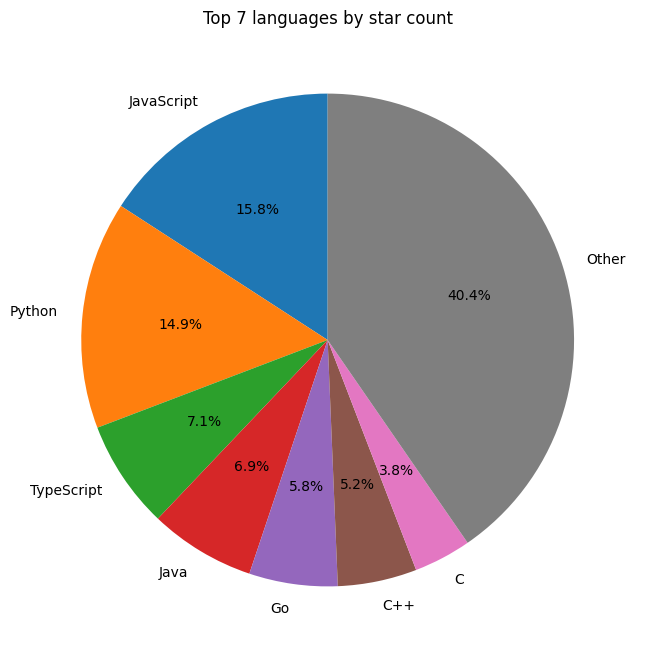

In [12]:
# Plot relative sizes of top 7 languages
top_languages = df.groupby('primaryLanguage').agg({'stars': 'sum'}).sort_values(by='stars', ascending=False).head(7).index
# get the total star count for all other languages
other_stars = df[~df['primaryLanguage'].isin(top_languages)].agg({'stars': 'sum'})['stars']
# make a list of tuples of (language, star count)
star_counts = [(lang, df[df['primaryLanguage'] == lang].agg({'stars': 'sum'})['stars']) for lang in top_languages]
star_counts.append(('Other', other_stars))

# make the pie chart
plt.figure(figsize=(8, 8))
plt.pie([star_count for lang, star_count in star_counts], labels=[lang for lang, star_count in star_counts], autopct='%1.1f%%', startangle=90)
plt.title('Top 7 languages by star count')
plt.show()

In [13]:
# What is my g-index?
g_index_by_author['pelmers']

4

In [14]:
# Print owner/name of top 10 by issue count
df.sort_values(by='issues', ascending=False).head(10)[['owner', 'name', 'issues', 'pullRequests']]

,owner,name,issues,pullRequests
22,microsoft,vscode,161606,23341
24093,AdguardTeam,AdguardFilters,147889,11385
68569,webcompat,web-bugs,125312,15
30713,ron190,jsql-injection,95415,37
20,flutter,flutter,85634,46379
4934,MicrosoftDocs,azure-docs,76947,36093
2330445,ZeroK-RTS,CrashReports,76405,0
2330481,ZeroK-RTS,CrashReports,76405,0
987933,h4sh5,pypi-auto-scanner,67018,0
156,python,cpython,64260,43224


In [15]:
# Print owner/name of top 10 by pull request count
df.sort_values(by='pullRequests', ascending=False).head(10)[['owner', 'name', 'issues', 'pullRequests']]

,owner,name,issues,pullRequests
2179,NixOS,nixpkgs,31996,216775
189496,everypolitician,everypolitician-data,964,164990
750,Homebrew,homebrew-cask,6269,146688
2228,Homebrew,homebrew-core,5188,134434
1297,odoo,odoo,16519,113942
3755,microsoft,winget-pkgs,2925,113917
881,elastic,kibana,56710,107144
53853,JuliaRegistries,General,143,89724
2504443,test-organization-kkjeer,bot-validation,62086,81258
2906272,test-organization-kkjeer,app-test,46724,80522


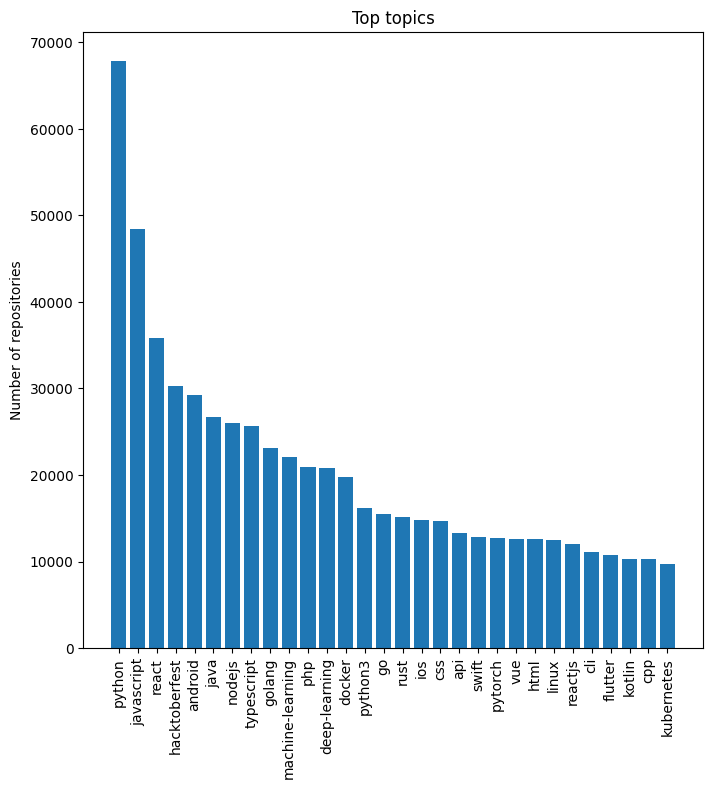

In [16]:
# Find the frequency of every topic
from collections import Counter
topic_counts = Counter()
for topics in df['topics']:
    for topic in topics:
        topic_counts[topic['name']] += 1
# Make bar chart
plt.figure(figsize=(8, 8))
plt.bar([topic for topic, count in topic_counts.most_common(30)], [count for topic, count in topic_counts.most_common(30)])
plt.xticks(rotation=90)
plt.title('Top topics')
plt.ylabel('Number of repositories')
plt.show()

In [19]:
# dataframe of all projects with >= 50 stars
star_df = df[df['stars'] >= 50]
# count?
print(f"Number of projects with >= 50 stars: {len(star_df)}")

# percentage of projects with >= 10 users
print(f"{len(star_df[star_df['assignableUserCount'] >= 10]) / len(star_df) * 100}% of projects with >= 50 stars have >= 10 assignable users")

# percentage of projects with >= 50 pull requests
print(f"{len(star_df[star_df['pullRequests'] >= 50]) / len(star_df) * 100}% of projects with >= 50 stars have >= 50 pull requests")

# percentage of projects with a lastPushedAt in the last 4 years
print(f"{len(star_df[star_df['pushedAt'] > '2019-01-01']) / len(star_df) * 100}% of projects with >= 50 stars have been pushed to in the last 4 years")

Number of projects with >= 50 stars: 552258
8.83753607915141% of projects with >= 50 stars have >= 10 assignable users
19.136707843073346% of projects with >= 50 stars have >= 50 pull requests
80.42146967540533% of projects with >= 50 stars have been pushed to in the last 4 years
